# Handwritten Digits Recognition with One-vs-All Classification Implementation

Automated handwritten digit recognition is widely used today - from recognizing zip codes (postal codes) on mail envelopes to recognizing amounts written on bank checks. This exercise will show how the methods you've learned can be used for this classication task.

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.io import loadmat
import warnings; warnings.simplefilter('ignore')

## Data Visualisation

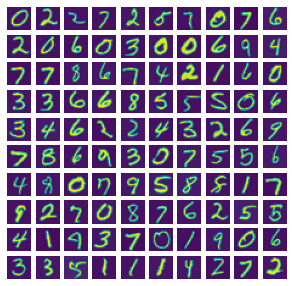

In [16]:
# load data
num_labels = 10
data = loadmat('handwritten_digits.mat')
#np.random.shuffle(data)
xy = np.append(data['X'],data['y'],axis=1)
np.random.shuffle(xy)
train_x = xy[:4000,:-1]; train_y = xy[:4000,-1]
test_x = xy[4000:,:-1]; test_y = xy[4000:,-1]
X = train_x; y = train_y
m,n = X.shape[0],X.shape[1]
y = np.where(y==10,0,y).reshape(m,1)
test_y = np.where(test_y==10,0,test_y).reshape(test_y.shape[0],1)

tmp = X
tmp1 = test_x
sel = X[:100]
def displaydata(sel):
    fig, axs =plt.subplots(10,10,figsize=(5,5))
    for i in range(10):
        for j in range(10):
            axs[i,j].imshow(sel[i*10+j].reshape(20,20).T)
            axs[i,j].axis('off')
displaydata(sel)

## Model contruction

In [19]:
def sigmoid(z):
    g = np.zeros(z.shape)
    g = 1.0/(1+np.exp(-z))
    return g

def costFunctionReg(theta,X,y,lamda):
    m,n = X.shape[0],X.shape[1]
    J = 0.0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta))
    J = 1./m*( -(np.log(h)).T.dot(y)- (np.log(1-h)).T.dot(1-y))\
        + lamda/(2*m)*(theta[1:].T.dot(theta[1:]))
    return J

def gradient(theta,X,y,lamda):
    m,n = X.shape[0],X.shape[1]
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta))
    grad = 1./m*(X.T).dot(h-np.squeeze(y))+lamda/m*theta
    grad[0] = grad[0] - lamda/m*theta[0]
    return grad

def oneVsAll(X,y,num_labels,lamda):
    m,n = X.shape[0],X.shape[1]
    all_theta = np.zeros((num_labels,n))
    initial_theta = np.zeros((n,1))
    for c in range(num_labels):
        xopt = minimize(costFunctionReg, x0=initial_theta, args=(X,(y==c),lamda), jac = gradient, method='TNC',options={'disp':True})
        all_theta[c,:] = xopt.x
    return all_theta

def predictOneVsAll(all_theta, X):
    return np.argmax(X.dot(all_theta.T),axis=1)

## Accuracies

In [20]:
lamda = 0.1
X = np.append(np.ones((m,1)),tmp,axis=1)
all_theta = oneVsAll(X,y,10,lamda)
pred = predictOneVsAll(all_theta,X)
accu = sum([1 for i in range(m) if abs(pred[i]-y[i]) < 0.001])/m*100
print('Training Set Accuracy: %.2f\n'% accu);

  NIT   NF   F                       GTG
    0    1  6.931471805599461E-01   2.92720196E+00
    1    6  7.634910581625086E-02   3.90943687E-03
    2   17  3.250261167998467E-02   8.04643062E-04
tnc: fscale = 35.2532
    3   27  1.769019997411293E-02   2.41727139E-04
    4   34  1.200489883987910E-02   1.94353995E-05
    5   39  1.096711524934878E-02   1.71313493E-06
tnc: fscale = 764.019
    6   47  9.631177708510040E-03   2.50911420E-06
    7   56  8.864312397596306E-03   4.44418989E-07
    8   63  8.690854388014651E-03   8.00562751E-08
    9   72  8.624848873828781E-03   1.32270193E-08
   10   81  8.605632432680133E-03   5.74427550E-09
   11   90  8.597306082868699E-03   1.20989494E-08
   12   98  8.593507240265901E-03   5.91341054E-09
   13  107  8.591115700501892E-03   8.85273018E-10
tnc: fscale = 33609.4
   14  115  8.590014681603458E-03   8.63064180E-10
   15  125  8.589356070442276E-03   3.35584021E-10
   16  134  8.589106224967979E-03   6.43843313E-10
   17  150  8.588974068477

   25  237  5.447078116933081E-02   8.13397815E-11
tnc: |fn-fn-1] = 5.156e-09 -> convergence
   26  240  5.447077601333409E-02   1.01201542E-10
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  6.931471805599460E-01   3.04062605E+00
    1    5  1.050093823603906E-01   1.14044884E-02
    2   15  5.712379990448000E-02   1.97589025E-03
tnc: fscale = 22.4967
    3   25  3.523948767910238E-02   5.62677564E-04
    4   33  2.587030503629763E-02   2.08286955E-05
    5   45  2.076963655440532E-02   3.51310103E-05
    6   54  1.808565119480970E-02   2.98214263E-05
    7   64  1.707351131008844E-02   1.27025282E-06
tnc: fscale = 887.268
    8   72  1.688415825400911E-02   1.23220395E-06
    9   81  1.672741989052636E-02   2.55591125E-07
   10   89  1.667590100782575E-02   2.88568015E-08
   11   98  1.666432457865682E-02   4.28288345E-08
   12  107  1.665986100610068E-02   2.80598321E-09
tnc: fscale = 18878.1
   13  121  1.665701119313307E-02   7.71779379E-10

Training Set Accuracy: 96.83



   19  173  6.858367446844049E-02   2.79884017E-09
   20  180  6.858347040040531E-02   1.09859623E-09
   21  191  6.858330787329603E-02   1.01099094E-09
   22  201  6.858322011577798E-02   5.77931280E-10
   23  218  6.858311428845834E-02   9.29207260E-11
   24  229  6.858308681096126E-02   9.67649305E-11
   25  240  6.858306539877083E-02   2.13895532E-11
tnc: |fn-fn-1] = 8.06263e-09 -> convergence
   26  250  6.858305733613759E-02   4.80443754E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


## Prediction

In [21]:
test_x = np.append(np.ones((test_x.shape[0],1)),tmp1,axis=1)
pred = predictOneVsAll(all_theta,test_x)
accu = np.mean([1 for  i in range(test_x.shape[0]) if abs(pred[i]-y[i]) < 0.001])*100
print('Test Set Accuracy: %.2f\n'% accu);

Test Set Accuracy: 100.00



The number [8] below is predicted as: [8] !


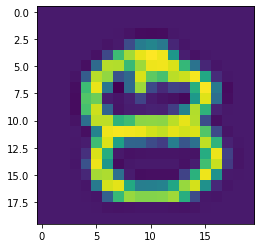

In [23]:
import random
i = random.randint(0,1000)
plt.imshow(test_x[i,1:].reshape(20,20).T)
val = np.argmax(test_x[i,:].dot(all_theta.T))
print('The number [%d] below is predicted as: [%d] !'% (test_y[i],val))